In [5]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE, locally_linear_embedding
from matplotlib import pyplot as plt
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


In [6]:
com1 = pd.read_pickle("./company_vectors/China Star_Sustainability Report.pkl")
com2 = pd.read_pickle("./company_vectors/Yongnam Annual Report 2010.pkl")

com1 = com1[-com1.token.str.contains('\(|\)|\.|\,')]
com2 = com2[-com2.token.str.contains('\(|\)|\.|\,')]

In [7]:
com1 = com1[com1.punc==False]
com1 = com1[com1.stopwords==False]
com2 = com2[com2.punc==False]
com2 = com2[com2.stopwords==False]

In [8]:
words = []
vectors = []

In [9]:
for i, word in enumerate(set(com1.token)):
    tm_df = com1[com1.token==word]
    tm_mat = np.matrix(tm_df.vector.to_list())
    tm_mat = tm_mat.mean(0)
    words.append(word)
    vectors.append(np.array(tm_mat)[0])

In [10]:
df1 = pd.DataFrame({'words':words, 'vector':vectors})

In [11]:
words2 = []
vectors2 = []

In [12]:
for i, word in enumerate(set(com2.token)):
    tm_df = com2[com2.token==word]
    tm_mat = np.matrix(tm_df.vector.to_list())
    tm_mat = tm_mat.mean(0)
    words2.append(word)
    vectors2.append(np.array(tm_mat)[0])

In [13]:
df2 = pd.DataFrame({'words':words2, 'vector':vectors2})

In [14]:
# prepare for plotting
lle = locally_linear_embedding(np.matrix(df1.vector.to_list()), n_components=2, n_neighbors=12)
lle = lle[0]
lle2 = locally_linear_embedding(np.matrix(df2.vector.to_list()), n_components=2, n_neighbors=12)
lle2 = lle2[0]

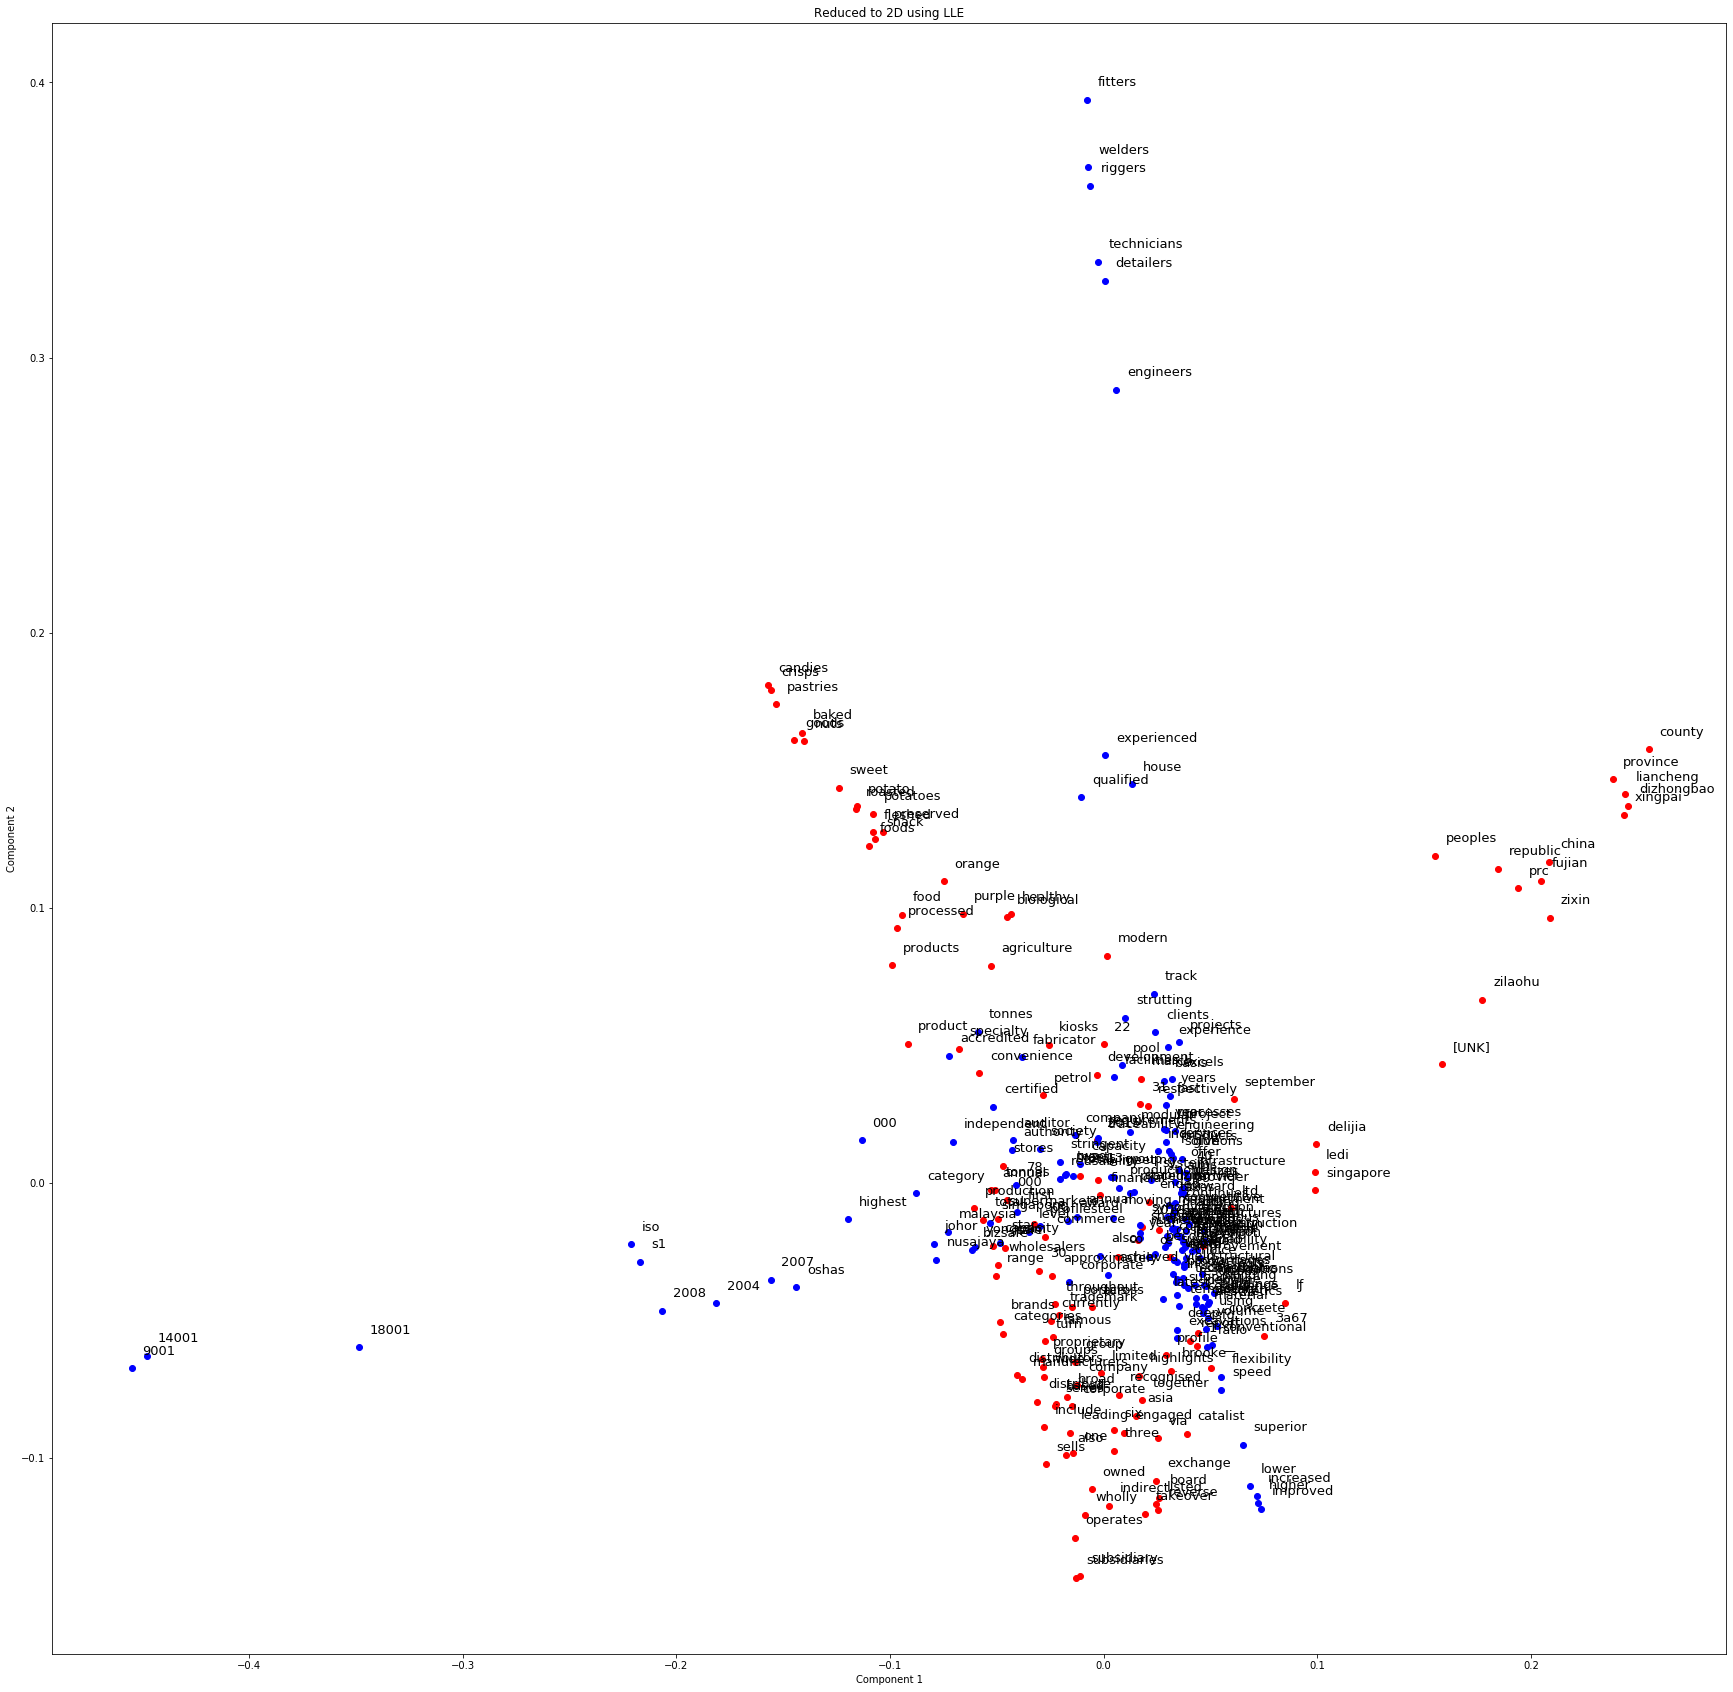

In [16]:
fig = plt.figure(figsize=(30, 30))
for i,t in enumerate(df1.words):
    x = lle[i,0]
    y = lle[i,1]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.005, y+0.005, t, fontsize=13)
    
for i,t in enumerate(df2.words):
    x = lle2[i,0]
    y = lle2[i,1]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x+0.005, y+0.005, t, fontsize=13)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')
plt.savefig('./LLE_reduce_firm_reports.png', transparent=True)
plt.show()